# UJM - Master DSC/MLDM - Deep Learning - TP1a

## Help and documentation on Keras

From the page of Keras: <https://keras.io>
In particular you will have access to some guides: <https://keras.io/guides/>
And the API where you can look for specific functions or functionalities <https://keras.io/api/>



### Part 1

As a cold start, we begin by considering some generated data

First we take the packages for displaying elements and generating data, we will use sklearn

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [3]:
centers = [(0, -5), (0, 5), (5, 0)]
X, y = make_blobs(n_samples=1000, n_features=2, cluster_std=1.5, centers=centers)

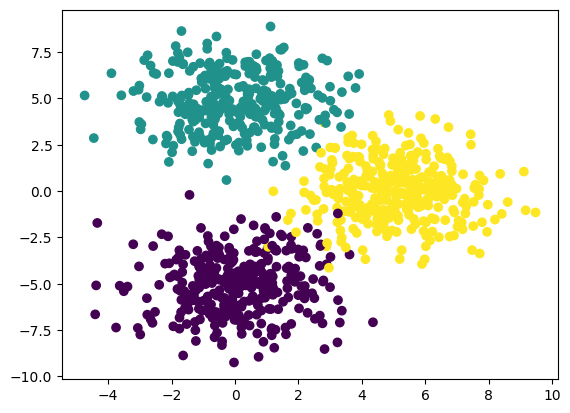

In [4]:
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [5]:
X[:10]

array([[-0.92666601, -5.02171855],
       [ 4.23988072, -0.93589301],
       [-0.07667333,  7.07525402],
       [ 7.79162637, -1.68231298],
       [ 0.646888  , -3.29895931],
       [ 3.83921523, -2.260131  ],
       [ 3.80608008, -1.42450141],
       [-4.74366433,  5.1588165 ],
       [ 6.60974437,  0.15381812],
       [ 1.14605321,  6.15014621]])

In [6]:
y[:10]

array([0, 2, 1, 2, 0, 2, 2, 1, 2, 1])

**Keras modules**

We now import keras modules for defining a MLP:
Sequential: type of Network, Dense: type of layers, Dropout allowing regularization, to_categorial for dealing with labels

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.utils import to_categorical

**Note** We need to convert the labels to categorical data (one-hot-vector) to be used for cross entropy loss with Keras, we have 3 classes here

In [8]:
Y = to_categorical(y, 3)

**Note** We prepare the data with a split into train/test with ration 2:1 ussing Sklearn train_test_split, random seed is initialized to 1

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.33,random_state=1)

**Note** We create a model with 3 layers, activations are ReLu and we add dropout regularizations. Last activation is softmax

In [10]:
from tensorflow.keras.layers import Dense, Dropout
model = Sequential()
model.add(Input(shape=(2,)))
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

**Note** we now define the loss (crossentropy), the optimizer (adam) and the performance metrics, and we print the model

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

None


**Note** we now launch training by fixing the number of epochs and the batch size

In [12]:
model.fit(X_train, y_train, epochs=50, batch_size=64)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1403 - loss: 3.1220
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1582 - loss: 2.9202 
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1940 - loss: 2.6962 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2299 - loss: 2.4637 
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2672 - loss: 2.3282 
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3179 - loss: 2.1098 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3627 - loss: 1.9359 
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4060 - loss: 1.7304 
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4313 - loss: 1.7023 
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4627 - loss: 1.5108 
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4657 - loss: 1.4733 
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 

**Note** we now display accuracy on train and test

In [14]:
_, train_acc = model.evaluate(X_train, y_train, batch_size=64)
_, test_acc = model.evaluate(X_test, y_test, batch_size=64)
print('training_accuracy:', train_acc)
print('testing_accuracy:', test_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9881 - loss: 0.2845  
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9848 - loss: 0.2801 
training_accuracy: 0.9880596995353699
testing_accuracy: 0.9848484992980957


##### key insight comparison between keras and torch
###### Keras run starts slowly with high loss and low accuracy, then accelerates sharply. Torch drops loss steadily from the start, showing smoother convergence. Keras begins around loss ≈3.1 and crawls down to ≈0.48 on the last epoch, while Torch moves gradually from ≈1.14 to ≈0.69.

**Note** if you fit again the model may continue to train

If you want to display the result every 10 epochs, you could use the following kind of loops
```
for i in range(5):
    model.fit(X_train, y_train, epochs=10, batch_size=64,verbose=0)
    _, train_acc = model.evaluate(X_train, y_train, batch_size=64)
    _, test_acc = model.evaluate(X_test, y_test, batch_size=64)
    print('training_accuracy, epoch number ', i*10+ 10,' : ', train_acc)
    print('testing_accuracy, epoch number ', i*10+ 10,' : ', test_acc,'\n')
```

**Question**
Use this procedure to compare the behavior of different optimizers available on Keras, check this page
<https://keras.io/api/optimizers/>
Try to compare the behavior of: SGD, RMSprop, Adam, Adadelta, Adagrad
Have a look to the available parameters

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import SGD, RMSprop, Adam, Adadelta, Adagrad

optimizers = {
    "SGD": SGD(learning_rate=0.05, momentum=0.9),
    "RMSprop": RMSprop(learning_rate=0.01, rho=0.9),
    "Adam": Adam(learning_rate=0.01),
    "Adadelta": Adadelta(learning_rate=1.0, rho=0.95),
    "Adagrad": Adagrad(learning_rate=0.01)
}

def build_model():
    m = Sequential()
    m.add(Input(shape=(2,)))
    m.add(Dense(6, activation='relu'))
    m.add(Dropout(0.2))
    m.add(Dense(6, activation='relu'))
    m.add(Dropout(0.2))
    m.add(Dense(3, activation='softmax'))
    return m

for name, opt in optimizers.items():
    print(f"\n=== Optimizer: {name} ===")

    model = build_model()
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    for i in range(5):  # 5 blocks × 10 epochs = 50 epochs
        model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)

        _, train_acc = model.evaluate(X_train, y_train, batch_size=64, verbose=0)
        _, test_acc  = model.evaluate(X_test, y_test, batch_size=64, verbose=0)

        print(f"Epoch {10*(i+1)} -> Train: {train_acc:.4f} | Test: {test_acc:.4f}")



=== Optimizer: SGD ===
Epoch 10 -> Train: 0.9851 | Test: 0.9879
Epoch 20 -> Train: 0.9851 | Test: 0.9848
Epoch 30 -> Train: 0.9866 | Test: 0.9818
Epoch 40 -> Train: 0.9851 | Test: 0.9788
Epoch 50 -> Train: 0.9896 | Test: 0.9848

=== Optimizer: RMSprop ===
Epoch 10 -> Train: 0.9925 | Test: 0.9848
Epoch 20 -> Train: 0.9925 | Test: 0.9818
Epoch 30 -> Train: 0.9925 | Test: 0.9818
Epoch 40 -> Train: 0.9896 | Test: 0.9818
Epoch 50 -> Train: 0.9896 | Test: 0.9788

=== Optimizer: Adam ===
Epoch 10 -> Train: 0.9925 | Test: 0.9879
Epoch 20 -> Train: 0.9925 | Test: 0.9848
Epoch 30 -> Train: 0.9910 | Test: 0.9848
Epoch 40 -> Train: 0.9910 | Test: 0.9848
Epoch 50 -> Train: 0.9910 | Test: 0.9879

=== Optimizer: Adadelta ===
Epoch 10 -> Train: 0.9851 | Test: 0.9848
Epoch 20 -> Train: 0.9896 | Test: 0.9879
Epoch 30 -> Train: 0.9910 | Test: 0.9848
Epoch 40 -> Train: 0.9910 | Test: 0.9848
Epoch 50 -> Train: 0.9925 | Test: 0.9848

=== Optimizer: Adagrad ===
Epoch 10 -> Train: 0.5716 | Test: 0.5697
Epoch

**Question** Using your favorite optimizer, try to change the architecture by simplifying or complexifying it, how the performance evolves?
Objective: Learn to add normalization layers, dropout, L1/L2 regularization.

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Input
from keras.regularizers import l2
from keras.optimizers import RMSprop

architectures_keras = {
    "Simple": Sequential([
        Input(shape=(2,)),
        Dense(3, activation='softmax')
    ]),

    "Deeper": Sequential([
        Input(shape=(2,)),
        Dense(16, activation='relu'),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(3, activation='softmax')
    ]),

    "BatchNorm": Sequential([
        Input(shape=(2,)),
        Dense(16, use_bias=False),
        BatchNormalization(),
        Dense(16, use_bias=False),
        BatchNormalization(),
        Dense(3, activation='softmax')
    ]),

    "L2_Reg": Sequential([
        Input(shape=(2,)),
        Dense(6, activation='relu', kernel_regularizer=l2(1e-3)),
        Dropout(0.2),
        Dense(6, activation='relu', kernel_regularizer=l2(1e-3)),
        Dropout(0.2),
        Dense(3, activation='softmax')
    ]),

    "High_Dropout": Sequential([
        Input(shape=(2,)),
        Dense(6, activation='relu'),
        Dropout(0.5),
        Dense(6, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')
    ])
}

def train_10_epochs(model):
    model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=0)

def evaluate_model(model):
    _, tr = model.evaluate(X_train, y_train, verbose=0)
    _, te = model.evaluate(X_test, y_test, verbose=0)
    return tr, te

for name, model in architectures_keras.items():
    print(f"\n Architecture: {name}")

    # match Torch RMSprop settings
    if name == "L2_Reg":
        optimizer = RMSprop(learning_rate=0.01, rho=0.9)
    else:
        optimizer = RMSprop(learning_rate=0.01, rho=0.9)

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    for step in range(5):  # 5 × 10 epochs = 50 epochs
        train_10_epochs(model)
        tr, te = evaluate_model(model)
        print(f"Epoch {10*(step+1)} - Train: {tr*100:.2f}% | Test: {te*100:.2f}%")



 Architecture: Simple
Epoch 10 - Train: 98.81% | Test: 98.18%
Epoch 20 - Train: 98.96% | Test: 98.18%
Epoch 30 - Train: 99.10% | Test: 98.48%
Epoch 40 - Train: 99.25% | Test: 98.18%
Epoch 50 - Train: 99.10% | Test: 98.18%

 Architecture: Deeper
Epoch 10 - Train: 98.66% | Test: 98.48%
Epoch 20 - Train: 99.10% | Test: 98.79%
Epoch 30 - Train: 99.25% | Test: 98.48%
Epoch 40 - Train: 99.25% | Test: 98.79%
Epoch 50 - Train: 99.25% | Test: 98.79%

 Architecture: BatchNorm
Epoch 10 - Train: 98.36% | Test: 97.27%
Epoch 20 - Train: 97.31% | Test: 96.67%
Epoch 30 - Train: 97.61% | Test: 96.97%
Epoch 40 - Train: 99.10% | Test: 97.88%
Epoch 50 - Train: 99.10% | Test: 98.48%

 Architecture: L2_Reg
Epoch 10 - Train: 99.10% | Test: 99.09%
Epoch 20 - Train: 99.10% | Test: 98.79%
Epoch 30 - Train: 99.10% | Test: 98.79%
Epoch 40 - Train: 99.25% | Test: 99.09%
Epoch 50 - Train: 99.10% | Test: 98.18%

 Architecture: High_Dropout
Epoch 10 - Train: 97.76% | Test: 97.27%
Epoch 20 - Train: 97.01% | Test: 96.

**Final Question** Write down the similarities and differences between torch and keras version of the notebooks below.

Both frameworks reached the same conclusion: this synthetic 2-D blob problem is simple enough that almost any sensible network architecture converges to ~98–99% accuracy. In both notebooks, increasing model depth or adding dropout and L2 barely changed final performance. Complexity did not buy meaningful gains because the clusters are clean and linearly separable. The pattern of results is consistent across Torch and Keras runs.

Key differences sit in workflow style, not outcomes. PyTorch required explicit tensor conversion, dataloaders, manual training loops, and manual accuracy logic. Keras handled one-hot encoding automatically, managed batches internally through `fit`, and provided built-in evaluation utilities, which sped up scripting. In Torch, forward/backward/step logic was written explicitly, and loss behaved more steadily over epochs. In Keras, training was more “hands-off,” with more automatic features, but learning curves started slower. Both libraries produced equivalent decision boundaries and learned the same structure; Torch offered lower-level control, while Keras offered compact high-level training routines.


#### Despite different loss scales and optimization trajectories, both frameworks converged to the approximatelysame test accuracy (98.48%), demonstrating that; Framework choice becomes a matter of preference rather than performance - both PyTorch and Keras delivered identical results despite different internal optimization behaviors. The key is understanding each framework's strengths and default behaviors.